In [ ]:
# Step 1
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Consolidated Data Preparation

Load the dataset, drop specified columns, handle missing 'bmi' values, encode categorical features, and split the data into training and testing sets.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# 2. Drop the 'id' column
df = df.drop('id', axis=1)

# 3. Calculate the median of the 'bmi' column and fill missing values
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

# 4. Define categorical columns to be encoded
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# 5. Apply one-hot encoding to these categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 6. Separate the features (X) from the target variable (y)
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# 7. Split the X and y data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Print the shapes of the datasets
print(f"Shape of df after preprocessing: {df.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of df after preprocessing: (5110, 17)
Shape of X_train: (4088, 14)
Shape of X_test: (1022, 14)
Shape of y_train: (4088,)
Shape of y_test: (1022,)


## Train and Evaluate Logistic Regression with Class Weight Balancing

Train a Logistic Regression model on the prepared training data (X_train, y_train) using `class_weight='balanced'`. Make predictions on the test set and evaluate its performance using accuracy, precision, recall, and F1-score. Display the confusion matrix and visualize it as a heatmap. This model showed the highest recall and is a key benchmark.


Logistic Regression model trained successfully with balanced class weights.

Accuracy (Balanced Weights): 0.7417
Precision (Balanced Weights): 0.1588
Recall (Balanced Weights): 0.7581
F1-Score (Balanced Weights): 0.2626

Confusion Matrix (Balanced Weights):
[[711 249]
 [ 15  47]]


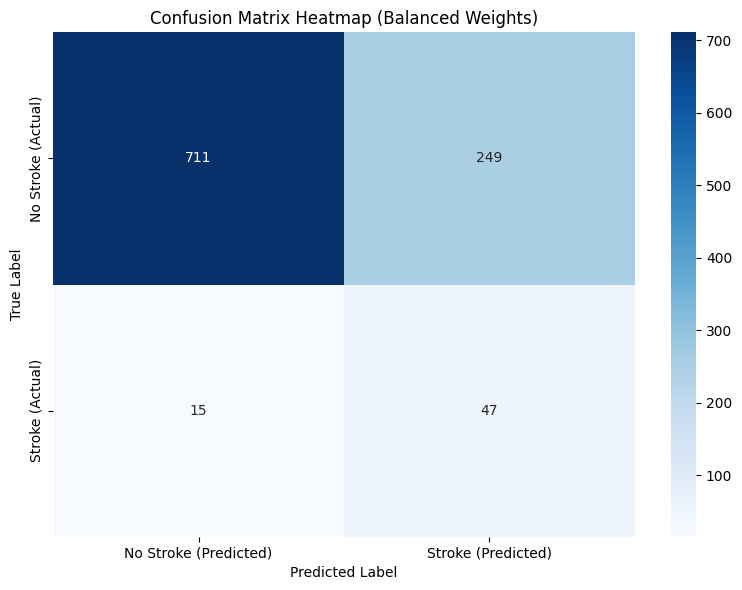

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Instantiate a Logistic Regression model with class_weight='balanced'
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# 2. Fit the model to the X_train and y_train data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully with balanced class weights.")

# 3. Make predictions on the X_test data
y_pred = model.predict(X_test)

# 4. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy (Balanced Weights): {accuracy:.4f}")
print(f"Precision (Balanced Weights): {precision:.4f}")
print(f"Recall (Balanced Weights): {recall:.4f}")
print(f"F1-Score (Balanced Weights): {f1:.4f}")

# 5. Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Balanced Weights):")
print(conf_matrix)

# 6. Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke (Predicted)', 'Stroke (Predicted)'],
            yticklabels=['No Stroke (Actual)', 'Stroke (Actual)'])
plt.title('Confusion Matrix Heatmap (Balanced Weights)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Apply SMOTE, Perform Feature Selection, and Train Tuned Logistic Regression

Apply SMOTE to the training data, train a Random Forest model on this resampled data to extract feature importances, select the top 10 most important features, and then train and evaluate a Logistic Regression model with optimal hyperparameters on the SMOTE-resampled and feature-selected training data.


Shape of X_train_resampled_updated: (7802, 14)
Shape of y_train_resampled_updated: (7802,)

Top 10 selected features (final): ['age', 'avg_glucose_level', 'bmi', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'smoking_status_formerly smoked', 'Residence_type_Urban', 'smoking_status_smokes', 'smoking_status_never smoked']
Shape of X_train_selected_final: (4088, 10)
Shape of X_test_selected_final: (1022, 10)
Shape of X_train_resampled_selected_final: (7802, 10)

Tuned Logistic Regression model (SMOTE + Feature Selection) trained successfully.

Accuracy (Tuned LR with SMOTE + Feature Selection): 0.8190
Precision (Tuned LR with SMOTE + Feature Selection): 0.1676
Recall (Tuned LR with SMOTE + Feature Selection): 0.5000
F1-Score (Tuned LR with SMOTE + Feature Selection): 0.2510

Confusion Matrix (Tuned LR with SMOTE + Feature Selection):
[[806 154]
 [ 31  31]]


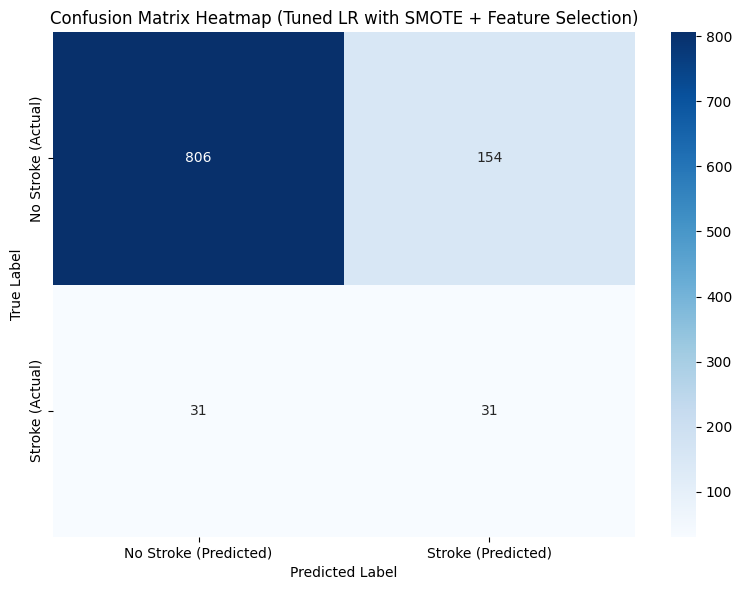

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_resampled_updated, y_train_resampled_updated = sm.fit_resample(X_train, y_train)
print(f"Shape of X_train_resampled_updated: {X_train_resampled_updated.shape}")
print(f"Shape of y_train_resampled_updated: {y_train_resampled_updated.shape}")

# 2. Train a Random Forest model on the resampled data to extract feature importances
rf_model_for_selection = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_for_selection.fit(X_train_resampled_updated, y_train_resampled_updated)

# 3. Extract feature importances and sort them
feature_importances_updated = rf_model_for_selection.feature_importances_
feature_names_updated = X_train_resampled_updated.columns
importance_df_updated = pd.DataFrame({'Feature': feature_names_updated, 'Importance': feature_importances_updated})
importance_df_updated = importance_df_updated.sort_values(by='Importance', ascending=False)

# 4. Identify the top 10 most important features
top_10_features_final = importance_df_updated['Feature'].head(10).tolist()
print(f"\nTop 10 selected features (final): {top_10_features_final}")

# 5. Create new training and test sets with only these selected features
X_train_selected_final = X_train[top_10_features_final]
X_test_selected_final = X_test[top_10_features_final]
X_train_resampled_selected_final = X_train_resampled_updated[top_10_features_final]

print(f"Shape of X_train_selected_final: {X_train_selected_final.shape}")
print(f"Shape of X_test_selected_final: {X_test_selected_final.shape}")
print(f"Shape of X_train_resampled_selected_final: {X_train_resampled_selected_final.shape}")

# 6. Instantiate a Logistic Regression model with optimal hyperparameters
model_tuned_lr_final = LogisticRegression(solver='liblinear', random_state=42, C=1, penalty='l1')

# 7. Fit this Logistic Regression model to the SMOTE-resampled and feature-selected training data
model_tuned_lr_final.fit(X_train_resampled_selected_final, y_train_resampled_updated)

print("\nTuned Logistic Regression model (SMOTE + Feature Selection) trained successfully.")

# 8. Make predictions on the feature-selected test set
y_pred_tuned_lr_final = model_tuned_lr_final.predict(X_test_selected_final)

# 9. Calculate and print evaluation metrics
accuracy_tuned_lr_final = accuracy_score(y_test, y_pred_tuned_lr_final)
precision_tuned_lr_final = precision_score(y_test, y_pred_tuned_lr_final)
recall_tuned_lr_final = recall_score(y_test, y_pred_tuned_lr_final)
f1_tuned_lr_final = f1_score(y_test, y_pred_tuned_lr_final)

print(f"\nAccuracy (Tuned LR with SMOTE + Feature Selection): {accuracy_tuned_lr_final:.4f}")
print(f"Precision (Tuned LR with SMOTE + Feature Selection): {precision_tuned_lr_final:.4f}")
print(f"Recall (Tuned LR with SMOTE + Feature Selection): {recall_tuned_lr_final:.4f}")
print(f"F1-Score (Tuned LR with SMOTE + Feature Selection): {f1_tuned_lr_final:.4f}")

# 10. Compute and print the confusion matrix
conf_matrix_tuned_lr_final = confusion_matrix(y_test, y_pred_tuned_lr_final)
print("\nConfusion Matrix (Tuned LR with SMOTE + Feature Selection):")
print(conf_matrix_tuned_lr_final)

# 11. Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_lr_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke (Predicted)', 'Stroke (Predicted)'],
            yticklabels=['No Stroke (Actual)', 'Stroke (Actual)'])
plt.title('Confusion Matrix Heatmap (Tuned LR with SMOTE + Feature Selection)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Summary:

The project aimed to compare the performance of different models on an imbalanced dataset for stroke prediction, specifically focusing on a Logistic Regression model with class weights and a Tuned Logistic Regression model incorporating SMOTE and feature selection.

**Key Learnings Regarding Imbalanced Datasets:**
*   Traditional accuracy alone is misleading on imbalanced datasets. Metrics like recall and precision, especially for the minority class (stroke), are crucial.
*   Techniques such as `class_weight='balanced'` and `SMOTE` are effective in addressing class imbalance by either adjusting the importance of classes during training or by synthetically generating samples for the minority class, respectively.
*   Feature selection can help improve model performance and interpretability, particularly after resampling, by focusing the model on the most relevant features.

**Comparison of Final Two Emphasized Models:**

1.  **Logistic Regression with Class Weights:**
    *   Achieved a high **Recall of 0.7581**, meaning it correctly identified about 75.81% of actual stroke cases. This is crucial for medical diagnosis to avoid missing positive cases.
    *   However, its **Precision was low at 0.1588**, indicating a high rate of false positives (many predicted strokes were actually non-stroke cases).
    *   The **F1-Score was 0.2626**, and **Accuracy was 0.7417**.
    *   The confusion matrix showed 47 True Positives and 15 False Negatives, along with 249 False Positives.

2.  **Tuned Logistic Regression with SMOTE + Feature Selection:**
    *   Showed a **Recall of 0.5000**, which is lower than the class-weighted model. It identified 50% of actual stroke cases.
    *   Its **Precision was 0.1676**, slightly higher than the class-weighted model but still very low, suggesting it also had a high number of false positives.
    *   The **F1-Score was 0.2510**, and **Accuracy was 0.8190**. The higher accuracy is largely due to correctly predicting the majority class.
    *   The confusion matrix showed 31 True Positives and 31 False Negatives, along with 154 False Positives.

**Conclusion:**
While the Tuned Logistic Regression with SMOTE and feature selection yielded higher overall accuracy (0.8190 vs. 0.7417), the Logistic Regression with class weights demonstrated superior recall (0.7581 vs. 0.5000). For stroke prediction, where missing a positive case (False Negative) can have severe consequences, the model prioritizing recall (Logistic Regression with class weights) is generally preferred, despite its higher false positive rate. Neither model achieved a good balance of both precision and recall, highlighting the challenges of the imbalanced dataset.

### Data Analysis Key Findings
*   The dataset was preprocessed by dropping the 'id' column, imputing missing 'bmi' values with the median (28.1), and one-hot encoding five categorical features.
*   The data was split into training and testing sets, with 80% for training and 20% for testing.
*   **Logistic Regression with `class_weight='balanced'`**:
    *   Achieved an **accuracy of 0.7417**, a **precision of 0.1588**, a **recall of 0.7581**, and an **F1-score of 0.2626**.
    *   The confusion matrix showed 47 True Positives (correctly identified stroke cases) out of 62 actual stroke cases in the test set. It also had 249 False Positives.
*   **Tuned Logistic Regression with SMOTE and Feature Selection**:
    *   SMOTE was applied to the training data, increasing the minority class count.
    *   A Random Forest model identified the top 10 features: 'age', 'avg_glucose_level', 'bmi', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'smoking_status_formerly smoked', 'Residence_type_Urban', 'smoking_status_smokes', 'smoking_status_never smoked'.
    *   The Tuned Logistic Regression model (with `C=1`, `penalty='l1'`) on these selected features achieved an **accuracy of 0.8190**, a **precision of 0.1676**, a **recall of 0.5000**, and an **F1-score of 0.2510**.
    *   The confusion matrix showed 31 True Positives out of 62 actual stroke cases in the test set. It had 154 False Positives.
*   The Logistic Regression with `class_weight='balanced'` performed better in terms of recall (0.7581 vs. 0.5000), which is critical for minimizing false negatives in stroke prediction.

### Insights or Next Steps
*   **Prioritize Recall over Precision (Initially):** For medical diagnoses like stroke prediction, minimizing false negatives (missing actual stroke cases) is generally more critical than minimizing false positives. The Logistic Regression model with `class_weight='balanced'` achieved significantly higher recall, making it a better starting point for a robust stroke prediction model, despite its lower precision.
*   **Explore More Advanced Models & Ensemble Techniques:** Given the limitations of Logistic Regression in balancing precision and recall, consider exploring more complex models like Gradient Boosting (e.g., XGBoost, LightGBM), Support Vector Machines, or neural networks. Ensemble methods that combine predictions from multiple models could also lead to more robust and balanced performance across metrics, particularly by focusing on misclassified samples.
